<a href="https://colab.research.google.com/github/ahnusunha/MS_AI/blob/main/230131/makeRect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
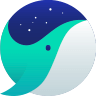
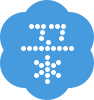

In [2]:
requests.get('http://naver.com').text

In [30]:
endpoint = 'https://labuser8computervision.cognitiveservices.azure.com/'
key = '3efe2936a8154f30a49a38b6f1c65a42'

In [48]:
endpoint = endpoint + 'vision/v2.0/'

In [50]:
analysisEndpoint = endpoint + 'analyze'

In [51]:
from PIL import Image
from io import BytesIO

In [52]:
image_url = 'https://cdn.huffingtonpost.kr/news/photo/201602/22260_43420.jpeg'

In [53]:
image = Image.open(BytesIO(requests.get(image_url).content))

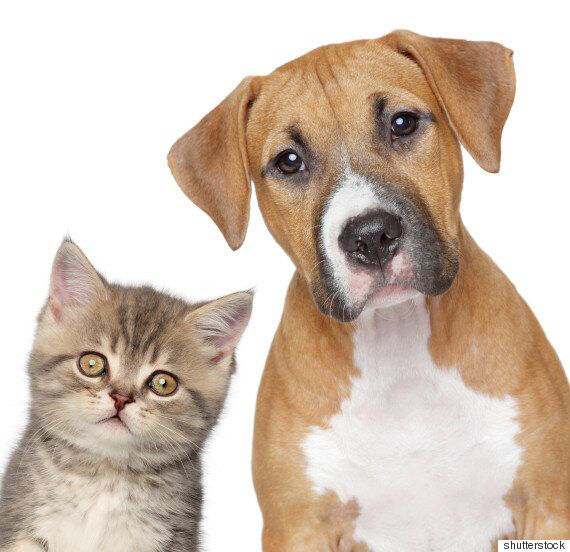

In [54]:
image

In [55]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [56]:
response = requests.post(analysisEndpoint,
                         headers=headers,
                         params=params,
                         json=data)

In [57]:
result = response.json()
result

{'categories': [{'name': 'animal_dog', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': '8E633D',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'cat',
   'brown',
   'indoor',
   'dog',
   'looking',
   'animal',
   'staring',
   'camera',
   'standing',
   'tan',
   'front',
   'table',
   'laying',
   'close',
   'orange',
   'bed'],
  'captions': [{'text': 'a close up of a dog and a cat looking at the camera',
    'confidence': 0.8600457150249555}]},
 'requestId': '4302fa1d-849e-4790-bdef-2895be56d23b',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [59]:
result['description']

{'tags': ['sitting',
  'cat',
  'brown',
  'indoor',
  'dog',
  'looking',
  'animal',
  'staring',
  'camera',
  'standing',
  'tan',
  'front',
  'table',
  'laying',
  'close',
  'orange',
  'bed'],
 'captions': [{'text': 'a close up of a dog and a cat looking at the camera',
   'confidence': 0.8600457150249555}]}

In [60]:
detectEndpoint = endpoint + 'detect'

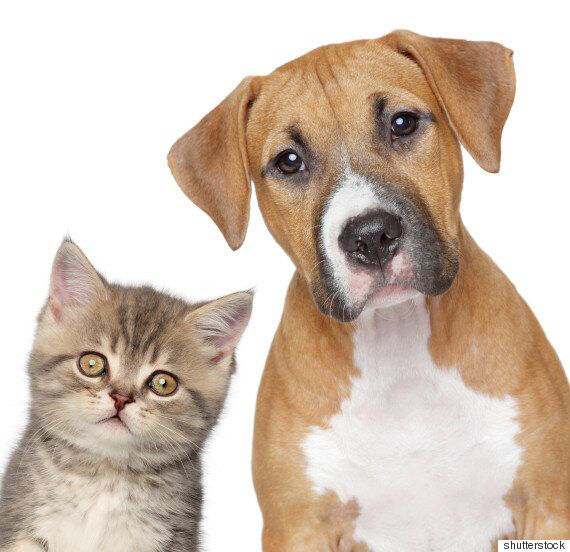

In [61]:
image

In [62]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [63]:
response = requests.post(detectEndpoint,
                         headers = headers,
                         params = params,
                         json = data)

In [64]:
result = response.json()

In [65]:
result

{'objects': [{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493},
   'object': 'dog',
   'confidence': 0.92,
   'parent': {'object': 'mammal',
    'confidence': 0.934,
    'parent': {'object': 'animal', 'confidence': 0.935}}},
  {'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317},
   'object': 'cat',
   'confidence': 0.869,
   'parent': {'object': 'mammal',
    'confidence': 0.88,
    'parent': {'object': 'animal', 'confidence': 0.881}}}],
 'requestId': '88bdb65a-be70-49fc-8792-eeddc62fac47',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [66]:
from PIL import Image, ImageDraw, ImageFont

In [79]:
def MakeRectangle(result):
  objects = result['objects']

  for obj in objects:
    print(obj)

    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y), (x+w,y+h)), outline='red')

In [80]:
draw = ImageDraw.Draw(image)
MakeRectangle(result)

{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493}, 'object': 'dog', 'confidence': 0.92, 'parent': {'object': 'mammal', 'confidence': 0.934, 'parent': {'object': 'animal', 'confidence': 0.935}}}
{'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317}, 'object': 'cat', 'confidence': 0.869, 'parent': {'object': 'mammal', 'confidence': 0.88, 'parent': {'object': 'animal', 'confidence': 0.881}}}


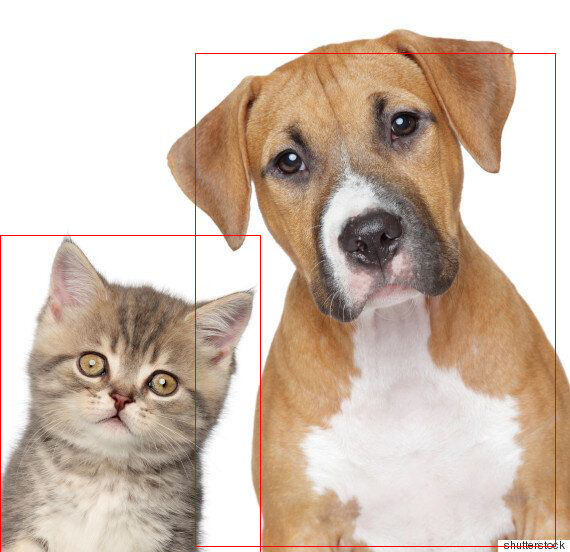

In [81]:
image